In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [48]:
# 1. PROCESSING THE DATA 
def get_data():
    df = pd.read_csv("./ecommerce_data.csv")
    
    # Converting into numpy ndarray
    data = df.values
    
    # Shuffle the data 
    np.random.shuffle(data)
    
    X = data[:, :-1]
    y = data[:, -1]
    
    
    # Working on categorical column
    # making them one hot encoded
    N, D = X.shape
    
    # D+3 as time_of_day has 4 different values (0, 1, 2, 3)
    X2 = np.zeros((N, D+3))
    X2[:, 0:(D-1)] = X[:, 0:(D-1)]
    
    # Getting the one hot encoded values for them
    for n in range(N):
        t = int(X[n, D-1])
        # populating the values for that column and putting 1 for which it belongs
        X2[n, t+D-1] = 1
    
    # split the data 
    X_train = X2[:-100]
    y_train = y[:-100]
    X_test = X2[-100:]
    y_test = y[-100:]
    
    
    # normalize the columns 1 and 2 
    # see how do we calculate mean and sigma using training values only
    for i in range(1, 3):
        m = X_train[:, i].mean()
        s = X_train[:, i].std()
        
        X_train[:, i] = (X_train[:, i] - m)/s
        X_test[:, i] = (X_test[:, i] - m)/s
    
    
    return X_train, X_test, y_train, y_test
    

In [49]:
def get_binary_data():
    # Out class label takes 4 different values, so to make it suitable for logisticregression as of now, we will 
    # just take
    # two categries only
    X_train, X_test, y_train, y_test = get_data()
    
    X2_train = X_train[y_train <= 1]
    y2_train = y_train[y_train <= 1]
    X2_test = X_test[y_test <= 1]
    y2_test = y_test[y_test <= 1]
    
    return X2_train, X2_test, y2_train, y2_test

In [50]:
X_train, X_test, y_train, y_test = get_binary_data()

In [51]:
# random initialization of weights 
D = X_train.shape[1]
w = np.random.randn(D)
b = 0

In [54]:
# make predictions
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

# cross entropy
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

In [70]:
# train loop
train_costs = []
test_costs = []
learning_rate = .1
for i in range(10000):
    pYtrain = forward(X_train, w, b)
    pYtest = forward(X_test, w, b)
    
    ctrain = cross_entropy(y_train, pYtrain)
    ctest = cross_entropy(y_test, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    # gradient descent
    w -= learning_rate*X_train.T.dot(pYtrain - y_train)
    b -= learning_rate*(pYtrain - y_train).sum()
    
    if i % 1000 == 0:
        print(i, ctrain, ctest)

0 0.22294037584992818 0.07507484706331094


C:\Users\sharm\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\sharm\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


1000 nan 0.07036521233674947
2000 nan 0.04354167610393843
3000 0.2072302802764261 0.09093148906339676
4000 0.2020927706122238 0.10405550850862505
5000 0.2155379538697416 0.07939882097398494
6000 0.20332713545123063 0.09962522369410018
7000 0.20837250496579285 0.08948289747378967
8000 nan 0.05179639996217152
9000 0.20198439635009943 0.10493272064794017


Final train classification_rate: 0.9655172413793104
Final test classification_rate: 0.9873417721518988


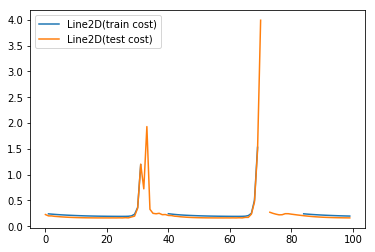

In [45]:
print("Final train classification_rate:", classification_rate(y_train, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(y_test, np.round(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()

0 0.830016312128345 0.8158349821341688
1000 0.18984505423907846 0.1617791829444269
2000 0.18887136513270938 0.16067817329856082
3000 0.1888102675194366 0.1605740140057322
4000 0.18880558089558916 0.16055512557525414
5000 0.18880520319837593 0.1605504911329284
6000 0.18880517234233574 0.1605492229566067
7000 0.1888051698117973 0.1605488642470158
8000 0.18880516960403565 0.16054876182067046
9000 0.18880516958697266 0.1605487324959502
Final train classification_rate: 0.9782608695652174
Final test classification_rate: 0.9868421052631579


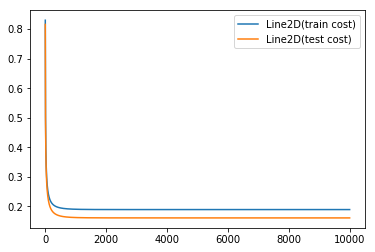

In [47]:
# get the data
Xtrain, Xtest, Ytrain, Ytest = get_binary_data()

# randomly initialize weights
D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0 # bias term

# make predictions
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

# cross entropy
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum()
    if i % 1000 == 0:
        print(i, ctrain, ctest)

print("Final train classification_rate:", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()